# Obsolescence, Electric Vehicles, and You!
### Understanding the improvements of technology and performance in electric vehicles over the years

![Picture of several electric vehicles lined up in a parking lot plugged into charging stations.](https://media-doppleronline-ca.s3-accelerate.amazonaws.com/2023/06/commercial-ev-charging-station.jpg)
##### Image Source: https://doppleronline.ca/huntsville/ontario-expands-electric-vehicle-charging-stations/

**Electric vehicles** (or '**EVs**') have seen massive growth in popularity in recent years. With more traditional car manufacturers entering and innovating in the market, consumers have more options at more affordable prices than ever before. This project aims to look at publically released EV models comparing their energy efficiency and battery capacity. The automobile market has been in a rough area for consumers with reasonable prices being few and far between in both the new, and used markets. On top of that, vehicle owners also have to worry about the cost of maintenance and gas. Many may be considering EVs for cheaper fuel, maintenance, or longevity. That being said, EVs come with their own set of drawbacks, notably the time it takes to charge, and time spent on the road before needing to recharge. Of course, purchasing older used models with now inferior technology should yield reduced performance. I predict a sharp incline in range from a full charge with more minor improvements being made to fuel efficiency. With that being said, are more recent improvements truly substantial enough to overlook the used market entirely? I will be taking a thorough look at the relationship between qualitative observations (release year, car type) and quantitative observations (battery capacity, energy efficiency, and recharge time). This should give you a good idea of how old is too old for EVs, the benefits of buying new as opposed to old EVs, and what you could possibly expect in the years to come.

## Data Collection
Natural Resources Canada tracks fuel consumption ratings of vehicles sold in Canada from 1995 to the present day. A subset of this data limited to EVs is available on the Open Canada Data website. Due to personal concerns regarding the permanence of the csv in it's current state, the data is loaded locally from a file rather than directly from the website.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading data
ev = pd.read_csv('my2012-2024-battery-electric-vehicles.csv')

## Data Cleaning
For the purposes I intended to use the dataset for, it was a complete mess. I started by removing columns I deemed were unnecessary, many being values regarding CO2 which yields the same result in every vehicle since electric cars don't emit CO2. Other removed columns measured how much energy was used in terms of litres of gas. While this is an interesting statistic it is irrelevant to the questions I answer through the analysis. While removing these columns aren't required, it makes the rest of the cleanup a lot easier. Next was renaming some columns with strange or awkward labels, this was also done for many entries in the "Vehicle Class" column.

Finally, Vehicle Classes according to the dataset is split into 16 categories, many of which are only utilized a few times. Since weight can have a significant impact on fuel efficiency, cars were assigned a "Weight Class" in a new column based on their "Vehicle Class".

**Weight Classes were divided into small, medium, and large based on the respective vehicle classes weight description from the Natural Resources Canada website [5].**

The head and tail of the dataset after the cleanup is displayed below for anybody that is curious to see the final result.

In [3]:
# Removing irrelevant columns
ev = ev.drop(["Transmission", "Fuel type", "City (Le/100 km)", "Highway (Le/100 km)", "Combined (Le/100 km)", "CO2 emissions (g/km)", "CO2 rating ", "Smog rating"], axis=1)

# Renaming columns
ev.columns = ["Year", "Brand", "Model", "Vehicle Class", "Motor (kW)", "City Efficiency", "Highway Efficiency", "Combined Efficiency", "Range (km)", "Hours To Recharge"]

# Adding new column and populating
ev["Weight Class"] = ev["Vehicle Class"]

ev = ev.replace({"Weight Class": {
    "Two-seater": "Small",
    "Minicompact": "Small",
    "Subcompact": "Small",
    "Compact": "Small",
    "Mid-size": "Medium",
    "Full-size": "Medium",
    "Station wagon: Small": "Large",
    "Station wagon: Mid-size": "Large",
    "Pickup truck: Small": "Small",
    "Pickup truck: Standard": "Medium",
    "Sport utility vehicle: Small": "Small",
    "Sport utility vehicle: Standard": "Medium",
    "Minivan": "Medium",
    "Van: Cargo": "Medium",
    "Van: Passenger": "Large",
    "Special purpose vehicle": "Medium",
}})

# Renaming certain classes in "Vehicle Class"
ev = ev.replace({"Vehicle Class": {
    "Station wagon: Small": "Small Station Wagon",
    "Station wagon: Mid-size": "Mid-size Station Wagon",
    "Pickup truck: Small": "Small Pickup Truck",
    "Pickup truck: Standard": "Standard Pickup Truck",
    "Sport utility vehicle: Small": "Small SUV",
    "Sport utility vehicle: Standard": "Standard SUV",
    "Van: Cargo": "Cargo Van",
    "Van: Passenger": "Passenger Van"
}})

ev

,Year,Brand,Model,Vehicle Class,Motor (kW),City Efficiency,Highway Efficiency,Combined Efficiency,Range (km),Hours To Recharge,Weight Class
0,2012,Mitsubishi,i-MiEV,Subcompact,49,16.9,21.4,18.7,100,7.0,Small
1,2012,Nissan,LEAF,Mid-size,80,19.3,23.0,21.1,117,7.0,Medium
2,2013,Ford,Focus Electric,Compact,107,19.0,21.1,20.0,122,4.0,Small
3,2013,Mitsubishi,i-MiEV,Subcompact,49,16.9,21.4,18.7,100,7.0,Small
4,2013,Nissan,LEAF,Mid-size,80,19.3,23.0,21.1,117,7.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...
687,2024,Volkswagen,ID.4 AWD Pro S,Small SUV,250,19.4,21.9,20.5,423,8.0,Small
688,2024,Volvo,C40 Recharge,Small SUV,185,17.8,21.8,19.6,478,8.0,Small
689,2024,Volvo,C40 Recharge Twin,Small SUV,300,19.8,23.0,21.2,414,8.0,Small
690,2024,Volvo,XC40 Recharge,Small SUV,185,17.8,22.0,19.7,472,8.0,Small


## Analysis
### Distributions
Looking at distributions of EVs released throughout the years properly illustrates not only the rapid growth in the industry this decade, but also highlights severly low numbers from 2012 - 2015.

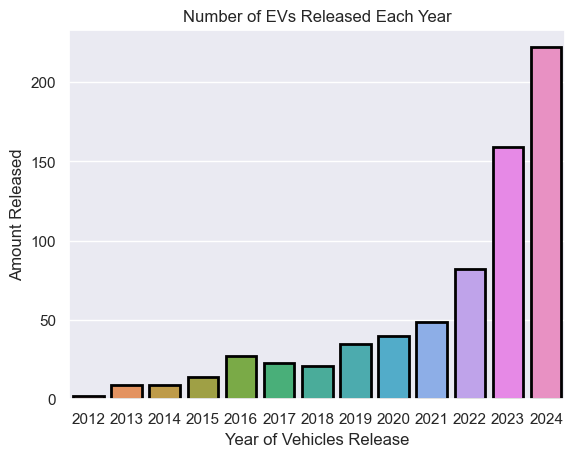

In [4]:
# Set base theme/style
sns.set_theme()

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
year_distro = sns.countplot(x = ev["Year"], linewidth = 2, edgecolor = "black")
year_distro = year_distro.set(title = "Number of EVs Released Each Year", xlabel = "Year of Vehicles Release", ylabel = "Amount Released")


Checking distributions among the Weight Classes shows a similar lack of data on large EVs.

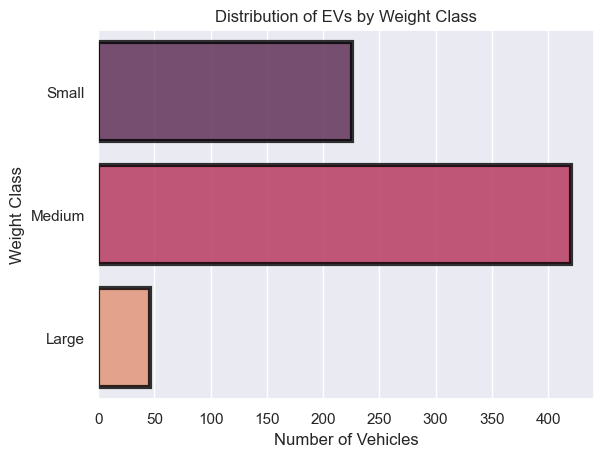

In [5]:
# Set base theme/style
sns.set_theme()

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
weight_distro = sns.countplot(y = ev["Weight Class"],
                              palette = "rocket",
                              alpha = 0.8,
                              linewidth = 3,
                              edgecolor = "black")
weight_distro = weight_distro.set(title = "Distribution of EVs by Weight Class", xlabel = "Number of Vehicles")

How may these distributions affect the accuracy of upcoming plots? Graphs using release year in the x axis may contain more volatile results in earlier years. As for graphs involving weight class, you'll soon see that data for large vehicles are not only more sporadic than it's counterparts, but also lacks any data whatsoever preceding 2015. The table below shows weight class distributions per year. Note that prior to 2020 there are at most just 3 large vehicles released per year. While this is less than ideal, it further reinforces the importance of dividing the vehicles into weight classes. Had vehicles been split by their vehicle class these problems would be amplified to the point where no conclusions could be easily made.

In [6]:
# Grouped operations, unstacked for a more easy to read format.
# Opted to put "Weight Class" before "Year" to make use of the otherwise empty space on the right
ev_weight_table = ev.groupby([ev["Weight Class"], ev["Year"]]).size().unstack()
display(ev_weight_table)

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Weight Class,,,,,,,,,,,,,
Large,NaN,NaN,NaN,1.0,1.0,2.0,2.0,3.0,4.0,10.0,8.0,10.0,5.0
Medium,1.0,5.0,4.0,7.0,20.0,16.0,13.0,25.0,24.0,25.0,42.0,101.0,137.0
Small,1.0,4.0,5.0,6.0,6.0,5.0,6.0,7.0,12.0,14.0,32.0,48.0,80.0


### Improvement (and deterioration) over the years

Comparing vehicle range overtime shows steady improvement as the years progress, with a large increase to medium vehicles in 2013, and large increases to other vehicles from 2016 - 2020. While improvement almost appears to have plateaued recently, there appear to be significant drops in range just 5 years prior to 2024. It is also worth noting that the plateau could be a result of the influx of new inexperienced EV manufacturers in recent years.

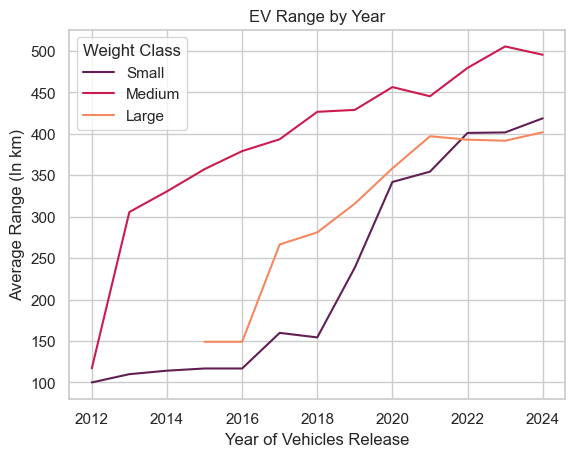

In [7]:
# Set base theme/style
sns.set_style("whitegrid")

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
range_plot = sns.lineplot(data = ev, x = "Year", y = "Range (km)",
                          hue = "Weight Class", 
                          errorbar = None,
                          palette = "rocket")
range_plot = range_plot.set(title = "EV Range by Year", xlabel = "Year of Vehicles Release", ylabel = "Average Range (In km)")

What I was surprised to discover is that fuel efficiency has actually gotten **worse** as time progressed. Furthermore, after 2017 and until this year large vehicles have been the **most** fuel efficient.

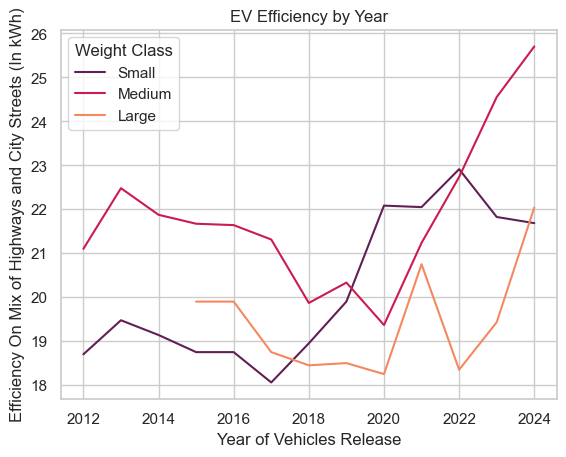

In [8]:
# Set base theme/style
sns.set_style("whitegrid")

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
efficiency_plot = sns.lineplot(data = ev, x = "Year", y = "Combined Efficiency",
                               hue = "Weight Class",
                               errorbar = None,
                               palette = "rocket")
efficiency_plot = efficiency_plot.set(title = "EV Efficiency by Year", xlabel = "Year of Vehicles Release", ylabel = "Efficiency On Mix of Highways and City Streets (In kWh)")

These results absolutely baffled me at first. How can improved technology result in deterioration of fuel efficiency? Well, looking at motors shows that more vehicles in recent years are being made with more powerful motors. This means that the vehicle can accelerate more quickly or match acceleration rates compared to lighter vehicles. It appears that EV manufacturers were simply not focused on improving fuel efficiency these past years. Additionaly, this push in motor power appears to be heavily skewed towards medium vehicles. This provides an adequate explanation for why large vehicles appear to be more fuel efficient.

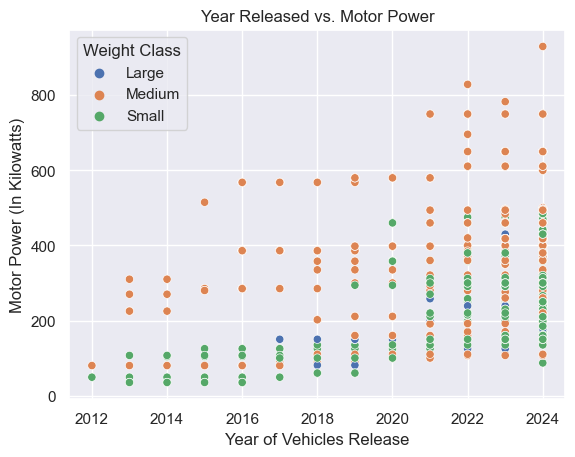

In [9]:
# Set base theme/style
sns.set_style("darkgrid")

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
motor_plot = sns.scatterplot(data = ev, x = "Year", y = "Motor (kW)", hue = "Weight Class", hue_order = ["Large", "Medium", "Small"])
motor_plot = motor_plot.set(title = "Year Released vs. Motor Power", xlabel = "Year of Vehicles Release", ylabel = "Motor Power (In Kilowatts)")

Finally, charge time has on average increased over the years at a rather unstable rate.

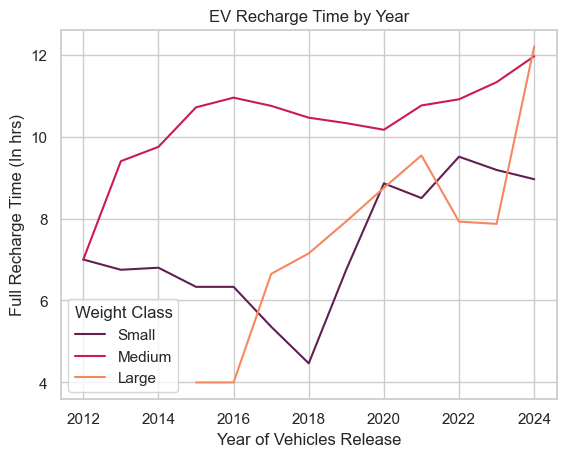

In [10]:
# Set base theme/style
sns.set_style("whitegrid")

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
recharge_plot = sns.lineplot(data = ev, x = "Year", y = "Hours To Recharge",
                             hue = "Weight Class",
                             errorbar = None,
                             palette = "rocket")
recharge_plot = recharge_plot.set(title = "EV Recharge Time by Year", xlabel = "Year of Vehicles Release", ylabel = "Full Recharge Time (In hrs)")

While not a particularily clean fit, there appears to be a meaningful correlation between recharge time and range. While both these values tend to increase with more recent improved technologies, at the moment recharge time appears to be influenced by range more than it's year of release.

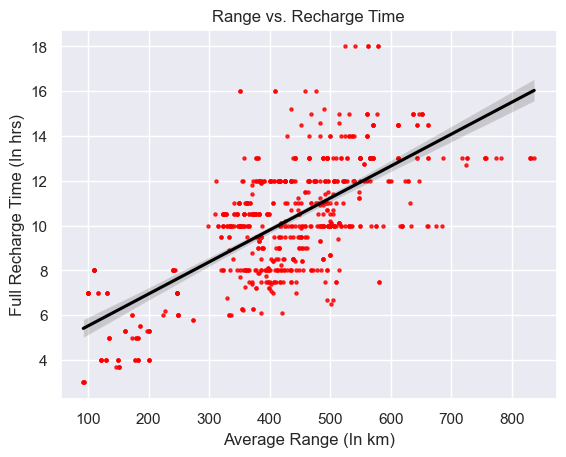

In [11]:
# Set base theme/style
sns.set_style("darkgrid")

# Plotting, changing axis labels/titles, more cosmetic  adjustments not included in base theme
Range_v_charge = sns.regplot(data = ev, x = "Range (km)", y = "Hours To Recharge",
                             color = "red",
                             line_kws = dict(color="black"),
                             scatter_kws = {'s': 5}) # Wasn't able to find this line in seaborn documentation, taken from stackoverflow [6].
Range_v_charge = Range_v_charge.set(title = "Range vs. Recharge Time", xlabel = "Average Range (In km)", ylabel = "Full Recharge Time (In hrs)")

## Discussion
Observations from the analysis focused primarily on drawing comparisons between EV performance and a respective vehicles year of release. Observations confirmed a substantial increase in average driving range as hypothesized, the most egrigous example being an approximate 4x increase over small vehicles. Fuel efficiency however saw it's peak back in the earlier days of EVs, with noticibly more electricity being used to power present day vehicles. This contradicts what was hypothesized regarding fuel efficiency. This was attributed a trend of increased power in motors, which is shown to have had much higher priority to manufacturer's than fuel efficiency to date. While recharge time also trends to higher lengths over the years their relationship seems rather volatile. Rather, recharge time appears to be most heavily influenced by vehicle range. But how does range increase when fuel efficiency declines? The only other factor that could directly influence range is battery capacity, which is unfortunately not included in the dataset. Nevertheless, it is safe to assume using common sense that battery capacity is what drives the increase in range. And since a larger battery capacity means more electricity is needed to charge the battery, we can conclude that battery size is influencing recharge time.

So how old is too old for a used EV? Well, while a reduced charge time in older models may sound appealing, the reduced range can make travelling long distances much more of a hassle. New smaller vehicles have good efficiency although some may need additional seating or space to take things on the road with them. Ironically, entering the used market you'll generally have better luck with fuel efficiency searching for large vehicles. Given the balance between vehicle range and recharge time I'd recommend trying to find used cars from 2020-2023. New cars released in 2024 shouldn't be overlooked either as they yield similar results compared to those released after 2020. While the ideal EV will vary depending on individual wants and needs, you should have a much better idea of where you should be looking and what to avoid.

## References
1. Source  Data (published by Natural Resources Canada): https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/026e45b4-eb63-451f-b34f-d9308ea3a3d9
2. Pandas for data manipulation
3. Seaborn for data vizualization
4. Matplotlib for data vizualization
5. "Understanding the tables" from Natural Resources Canada: https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383
6. Stackoverflow post from "Max Ghenis" for single line that alters regplot dot size: https://stackoverflow.com/questions/36921550/how-to-change-the-point-size-for-regplot-seaborns-scatter-plot-function-pyt